In [88]:
import pandas as pd


In [89]:
df = pd.read_csv('../raw_data/out.csv')


In [128]:
df.head()


,player_id,player_url,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,...,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url,labels,labels_2
0,158023,/player/158023/lionel-messi/230009,23,9,2023-01-13,L. Messi,Lionel Andrés Messi Cuccittini,RW,91,91,...,64+3,59+3,50+3,50+3,50+3,59+3,19+3,https://cdn.sofifa.net/players/158/023/23_120.png,1,1
1,165153,/player/165153/karim-benzema/230009,23,9,2023-01-13,K. Benzema,Karim Benzema,"CF, ST",91,91,...,64+3,60+3,55+3,55+3,55+3,60+3,18+3,https://cdn.sofifa.net/players/165/153/23_120.png,1,1
2,188545,/player/188545/robert-lewandowski/230009,23,9,2023-01-13,R. Lewandowski,Robert Lewandowski,ST,91,91,...,64+3,61+3,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/23_120.png,1,7
3,192985,/player/192985/kevin-de-bruyne/230009,23,9,2023-01-13,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,...,78+3,74+3,68+3,68+3,68+3,74+3,21+3,https://cdn.sofifa.net/players/192/985/23_120.png,1,5
4,231747,/player/231747/kylian-mbappe/230009,23,9,2023-01-13,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91,95,...,67+3,63+3,54+3,54+3,54+3,63+3,18+3,https://cdn.sofifa.net/players/231/747/23_120.png,1,8


# Load Data

In [90]:
df = pd.read_csv('../raw_data/out.csv')

df = df.fillna(0)


In [91]:
df_numerical_features = df.select_dtypes(include='number')
df_numerical_features = df_numerical_features.drop(columns=['player_id', 'fifa_version', 'fifa_update',
                                                      'overall', 'potential', 'league_id', 'club_team_id',
                                                      'club_jersey_number', 'club_contract_valid_until_year',
                                                      'nationality_id', 'nation_team_id', 'nation_jersey_number',
                                                      'goalkeeping_speed'])


In [92]:

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

df_numerical_features = pd.DataFrame(imputer.fit_transform(df_numerical_features), columns=df_numerical_features.columns)

df_numerical_features


,value_eur,wage_eur,age,height_cm,weight_kg,league_level,weak_foot,skill_moves,international_reputation,release_clause_eur,...,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,54000000.0,195000.0,35.0,169.0,67.0,1.0,4.0,4.0,5.0,99900000.0,...,75.0,96.0,20.0,35.0,24.0,6.0,11.0,15.0,14.0,8.0
1,64000000.0,450000.0,34.0,185.0,81.0,1.0,4.0,4.0,4.0,131200000.0,...,84.0,90.0,43.0,24.0,18.0,13.0,11.0,5.0,5.0,7.0
2,84000000.0,420000.0,33.0,185.0,81.0,1.0,4.0,4.0,5.0,172200000.0,...,90.0,88.0,35.0,42.0,19.0,15.0,6.0,12.0,8.0,10.0
3,107500000.0,350000.0,31.0,181.0,75.0,1.0,5.0,4.0,4.0,198900000.0,...,83.0,89.0,65.0,65.0,53.0,15.0,13.0,5.0,10.0,13.0
4,190500000.0,230000.0,23.0,182.0,73.0,1.0,4.0,5.0,4.0,366700000.0,...,80.0,88.0,26.0,34.0,32.0,13.0,5.0,7.0,11.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20646,80000.0,750.0,20.0,184.0,80.0,1.0,3.0,1.0,1.0,140000.0,...,14.0,32.0,15.0,12.0,13.0,46.0,51.0,46.0,52.0,53.0
20647,100000.0,500.0,18.0,170.0,58.0,1.0,3.0,2.0,1.0,175000.0,...,50.0,45.0,26.0,28.0,21.0,5.0,12.0,10.0,11.0,10.0
20648,90000.0,500.0,20.0,175.0,70.0,1.0,3.0,2.0,1.0,140000.0,...,40.0,37.0,35.0,22.0,12.0,13.0,7.0,7.0,8.0,9.0
20649,100000.0,500.0,23.0,161.0,56.0,1.0,3.0,2.0,1.0,155000.0,...,40.0,43.0,10.0,13.0,19.0,8.0,11.0,7.0,13.0,6.0


<Axes: >

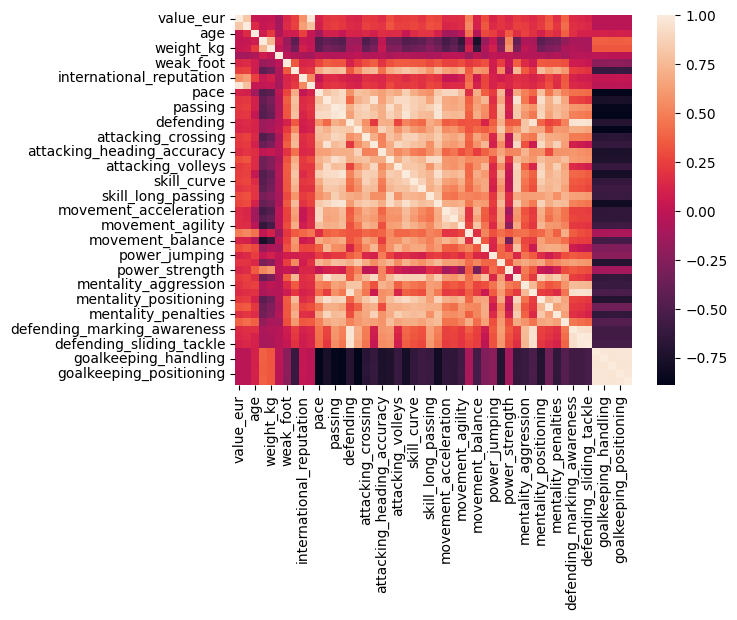

In [93]:
import seaborn as sns

sns.heatmap(df_numerical_features.corr())


# Preprocessed Data

In [94]:


from sklearn.preprocessing import StandardScaler

# Scale the data using StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_numerical_features), columns=df_numerical_features.columns)


# PCA fit and Transform (Dimensionality)

In [95]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(df_scaled)


PCA()

In [96]:
pca.explained_variance_ratio_


array([5.09268191e-01, 1.17978982e-01, 9.32928168e-02, 5.05182520e-02,
       3.67263326e-02, 2.49540888e-02, 1.94657623e-02, 1.67071092e-02,
       1.58434742e-02, 1.19947454e-02, 9.41216498e-03, 8.30355944e-03,
       6.96079218e-03, 6.31184259e-03, 5.83975978e-03, 5.33659368e-03,
       5.17979600e-03, 4.73002939e-03, 4.39182254e-03, 4.31789395e-03,
       4.11505329e-03, 3.77795566e-03, 3.73052977e-03, 3.29969840e-03,
       3.04826674e-03, 2.77996506e-03, 2.44060858e-03, 2.35331295e-03,
       2.12601463e-03, 1.75229777e-03, 1.61094699e-03, 1.31485116e-03,
       1.27018684e-03, 1.24081432e-03, 1.08300249e-03, 1.05750845e-03,
       9.70398338e-04, 6.66365059e-04, 6.29898852e-04, 5.82661493e-04,
       5.69162264e-04, 5.19750782e-04, 4.61197719e-04, 3.92602246e-04,
       3.50340701e-04, 1.37371245e-04, 1.06862900e-04, 4.12197861e-05,
       2.24177141e-05, 1.47282437e-05])

Text(0, 0.5, '% explained variance')

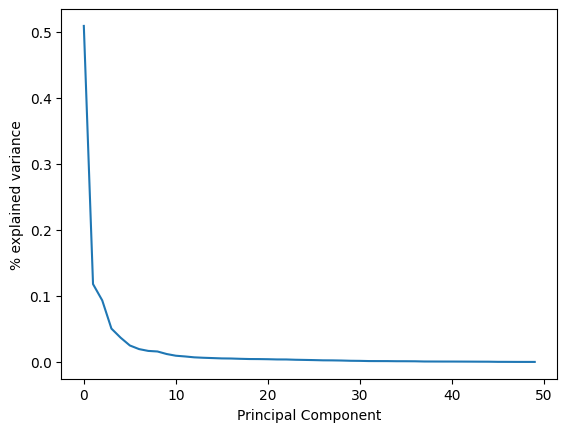

In [97]:

import matplotlib.pyplot as plt

plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Principal Component'); plt.ylabel('% explained variance')


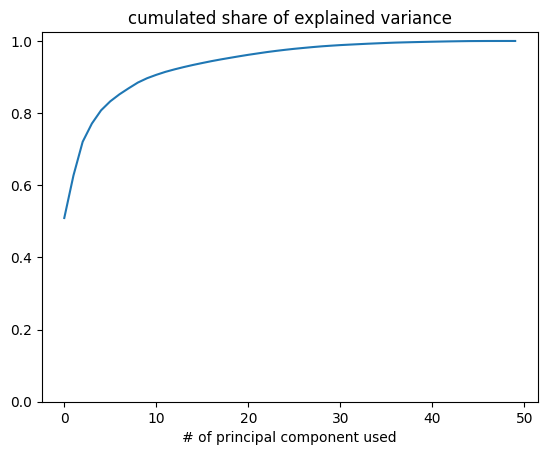

In [98]:
import numpy as np

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.ylim(ymin=0)
plt.title('cumulated share of explained variance')
plt.xlabel('# of principal component used');


In [99]:
X_proj = pca.transform(df_scaled)
X_proj = pd.DataFrame(X_proj, columns=[f'PC{i}' for i in range(1, 51)])  # rearrange order
X_proj


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50
0,-10.709602,-5.544427,14.081454,6.436160,5.620589,1.239016,0.990381,0.058222,5.546542,3.157416,...,-0.155379,0.030781,-0.169034,0.207976,-0.015516,0.014415,-0.013927,0.021329,0.010705,-0.016577
1,-10.701134,-3.060138,19.752172,7.152112,11.916380,1.665003,1.104522,-0.103209,4.765610,1.734883,...,-0.013313,-0.128111,-1.297339,-0.105309,-0.022135,-0.064105,-0.034060,0.052797,-0.021694,0.011975
2,-11.101743,-2.575132,22.041742,8.519159,13.753647,1.976571,1.333582,-0.102194,6.327216,1.555627,...,0.339156,-0.142980,-1.226060,0.458683,0.119550,-0.007564,-0.028391,0.033106,0.000205,-0.008087
3,-12.155697,-2.025762,21.200173,11.412653,11.966739,3.838904,2.108212,1.134119,2.973464,0.038714,...,0.039971,-0.074533,0.120732,0.130643,0.024476,0.053204,-0.046940,0.007019,-0.014414,-0.009045
4,-12.422169,-4.504105,25.129309,15.556998,21.743690,2.916302,1.576475,-0.651611,1.476901,-3.435501,...,0.188596,-0.387081,0.674326,-0.231415,0.106864,0.028485,0.000509,-0.009536,0.018935,-0.009556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20646,13.235396,-1.170724,-0.737102,0.672447,0.357082,1.709460,-0.279157,1.265309,1.132913,-0.454718,...,-0.171836,0.233273,0.035512,-0.051995,0.075197,-0.143152,0.075162,0.109694,0.016680,-0.063460
20647,2.258366,-3.867387,-4.099177,2.293924,0.902445,1.321202,-0.562718,0.542028,1.592130,-0.150713,...,-0.215837,0.161897,0.036792,0.254678,0.118140,0.021946,-0.016686,0.002918,0.003180,0.021888
20648,1.731310,-2.215638,-3.543223,1.540557,1.660927,-1.157319,-0.700109,0.456650,0.183221,0.477801,...,0.179181,-0.153641,0.047259,0.297830,-0.080710,-0.041154,-0.041405,0.051447,-0.003964,0.025060
20649,1.962179,-5.284707,-3.687591,2.565272,0.021869,0.436216,-0.565283,0.185292,1.673391,0.312123,...,-0.186899,-0.106740,0.040838,-0.231042,-0.056181,0.022804,0.048799,-0.011813,0.005646,-0.003911


## K-Means Loss Function and Hyperparameters

Choose K such that the inertia (Kmeans().inertia_) is minimized
Use the elbow method here as well

/Users/ayandantombela/.pyenv/versions/3.10.6/envs/APP/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ayandantombela/.pyenv/versions/3.10.6/envs/APP/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ayandantombela/.pyenv/versions/3.10.6/envs/APP/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ayandantombela/.pyenv/versions/3.10.6/envs/APP/l

Text(0.5, 0, 'k cluster number')

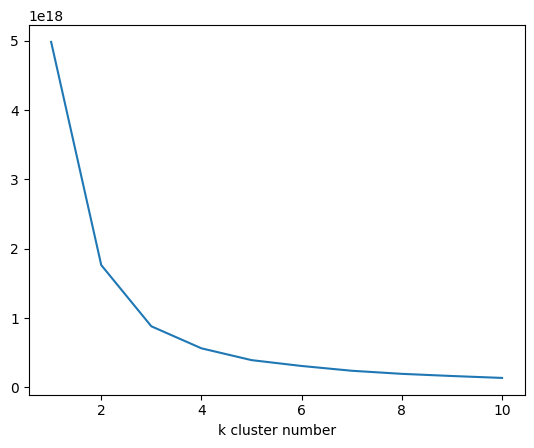

In [100]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt

inertias = []
ks = range(1,11)   # experiement with ranges

for k in ks:
    km_test = KMeans(n_clusters=k).fit(df_numerical_features)
    inertias.append(km_test.inertia_)

plt.plot(ks, inertias)
plt.xlabel('k cluster number')


In [101]:
from sklearn.cluster import KMeans

# Fit K-means
km = KMeans(n_clusters=3)
km.fit(X_proj)


/Users/ayandantombela/.pyenv/versions/3.10.6/envs/APP/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [102]:
km.cluster_centers_.shape


(3, 50)

In [103]:
km.labels_


array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [104]:
df ['labels'] = km.labels_

df.labels


0        1
1        1
2        1
3        1
4        1
        ..
20646    2
20647    0
20648    0
20649    0
20650    0
Name: labels, Length: 20651, dtype: int32

In [105]:
for group in sorted(df.labels.unique()):

    print("================")
    print(f"players belonging to group {group}")
    print("================")
    print(df[df['labels'] == group].sample(5)[['short_name']])


players belonging to group 0
       short_name
16367   M. Ndiaye
16926  E. McWoods
10950  B. Kallman
14305       S. Ba
16179    S. Singh
players belonging to group 1
            short_name
8167        I. Tellero
4706   Leôncio Lobeiro
4510         José Mari
5102         Q. Merlin
10744          C. Long
players belonging to group 2
            short_name
12921  G. Singh Sandhu
7046          B. Guzan
14664         M. Deman
2557          L. Hoyos
20491         G. Cörüt


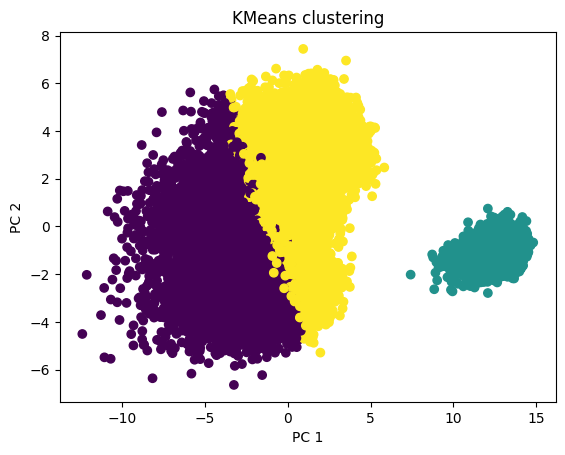

In [ ]:
plt.scatter(X_proj.iloc[:,0], X_proj.iloc[:,1], c=km.labels_)
plt.title('KMeans clustering'); plt.xlabel('PC 1'); plt.ylabel('PC 2');


# Model Prediction Score

In [114]:
# Fit a PCA with only 4 components
pca2 = PCA().fit(df_numerical_features)

# Project your data into 3 dimensions
X_proj2 = pd.DataFrame(pca2.fit_transform(df_numerical_features), columns= df_numerical_features.columns)

# We have "compressed" our dataset in 3D
X_proj2


,value_eur,wage_eur,age,height_cm,weight_kg,league_level,weak_foot,skill_moves,international_reputation,release_clause_eur,...,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,1.082082e+08,2.017648e+06,78967.280301,62.544952,-100.499082,44.183380,-3.407670,27.668835,-12.261961,-3.577271,...,-0.065951,0.233716,-0.314840,-0.253313,0.461017,0.108591,-0.178682,-0.329580,-0.494686,1.787619
1,1.406120e+08,-3.431746e+06,315996.790356,258.583363,-89.174123,174.533420,51.340123,46.376010,-6.573615,13.680743,...,0.694217,-1.303867,-0.411416,-1.166704,0.576441,-0.377217,-0.201731,0.263790,-0.299992,-1.138618
2,1.862189e+08,-4.436590e+06,244923.998691,245.758636,-72.559297,148.326493,61.587041,46.096004,-26.366023,28.872291,...,1.088210,-0.205305,-0.507524,-0.714546,0.470016,0.046833,-0.228410,-0.141470,-0.317897,-0.123910
3,2.207179e+08,4.220595e+06,121559.492256,213.305656,-18.227463,102.768523,9.906447,68.729449,-8.573764,31.381411,...,0.354571,0.999997,-0.849646,-0.265444,0.619148,-0.209637,0.890904,-0.202207,-0.551415,-0.900623
4,4.078975e+08,1.127067e+06,-169451.221471,196.505587,-43.014437,94.230639,62.404404,46.836830,-26.331521,25.257546,...,-0.050077,0.145756,0.045034,0.164222,0.741775,0.584383,-0.021325,-0.160726,0.374820,-0.693724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20646,-5.169399e+06,-2.105603e+05,-1988.540529,224.274979,-5.651755,6.742164,-1.408142,30.888342,-12.953235,4.477504,...,1.917301,-3.069389,1.695877,-2.347106,-0.494547,0.403958,0.655572,-1.259252,0.124006,-0.005709
20647,-5.129126e+06,-2.088170e+05,-2280.913780,31.597204,-49.916038,50.906526,-20.618227,32.171273,-14.870528,-3.355701,...,1.710923,0.441267,-0.396750,-0.104056,-0.653817,-0.071492,0.155191,0.472325,-0.394310,0.023585
20648,-5.164818e+06,-2.016719e+05,-2263.819353,21.423451,-31.740441,62.898478,-15.188580,-9.230335,-5.023042,3.168265,...,-1.752224,-0.742212,-0.840798,-1.053367,-0.669539,-0.241637,0.135481,0.547108,-0.261151,0.085115
20649,-5.146904e+06,-1.996547e+05,-2285.671347,33.260121,-72.161278,50.188384,-25.636700,23.016108,-17.682648,14.282516,...,0.220653,0.432416,0.936293,0.183447,-0.674520,0.036437,0.142440,-0.057685,-0.506372,0.073018


In [118]:
from sklearn.cluster import KMeans

# Fit K-means
km = KMeans(n_clusters=10)
km.fit(X_proj2)


/Users/ayandantombela/.pyenv/versions/3.10.6/envs/APP/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=10)

In [126]:
df ['labels_2'] = km.labels_

print(df.labels_2.unique())


[1 7 5 8 3 2 9 4 6 0]


In [127]:

sample_size = 3
population_size = len(df[df['labels_2'] == group])

for group in sorted(df.labels_2.unique()):
   if sample_size > population_size:
           sample_size = population_size

    # Adjust the sample size to be the same as the population size
    print(f"Players belonging to group {group}")
    print("================")
    print(sampled_rows)
    print("================")
    print(f"players belonging to group {group}")
    print("================")
    print(df[df['labels_2'] == group].sample(sample_size)[['short_name']])


players belonging to group 0
          short_name
16353    T. Geerkens
5551   K. Rosenberry
11213       I. Antón
players belonging to group 1
        short_name
268  Ferran Torres
165       T. Lemar
275       F. Wirtz
players belonging to group 2
          short_name
1024   M. Shaparenko
798       Florentino
350   Adriano Bisesi
players belonging to group 3
       short_name
2760  V. Gyökeres
1701     A. Maier
2251  Aihen Muñoz
players belonging to group 4
            short_name
19741  Jadson Bardeira
763            Pedraza
430            Morales
players belonging to group 5
       short_name
89          Pedri
36     F. de Jong
28  G. Donnarumma
players belonging to group 6
      short_name
2883  L. Sadílek
9080     B. Roux
5655   N. Nartey
players belonging to group 7
       short_name
53       K. Coman
37          Rodri
90  J. Bellingham
players belonging to group 8


ValueError: Cannot take a larger sample than population when 'replace=False'

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

print("accuracy 3 PCs")
print(cross_val_score(LogisticRegression(), X_proj3, y, cv=5).mean())

print("\naccuracy all 11 initial features")
print(cross_val_score(LogisticRegression(), X, y, cv=5).mean())


In [ ]:
from  import Preprocessor
